# The Vicsek model 

## Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def vecsum1(x,y):
    return [x[0]+y[0], x[1]+y[1]]

In [3]:
def distance1(x,y):
    return ((x[0]-y[0])**2 + (x[1]-y[1])**2)**(1/2)

In [4]:
def distance2(a,b,change=False):
    if a[0] - b[0] < -7.5:
        t1 = -15
    if a[0] - b[0] >= -7.5 and a[0] - b[0] <= 7.5:
        t1 = 0
    if a[0] - b[0] > 7.5:
        t1 = 15
    if a[1] - b[1] < -7.5:
        t2 = -15
    if a[1] - b[1] >= -7.5 and a[1] - b[1] <= 7.5:
        t2 = 0
    if a[1] - b[1] > 7.5:
        t2 = 15
    if change == True:
        return [b[0]-a[0]+t1, b[1]-a[1]+t2]  # this is for part 6.
    return np.sqrt((b[1]-a[1]+t2)**2 + (b[0]-a[0]+t1)**2)


In order to let the model have periodic boundry conditions, we use:

In [5]:
def periodicBC(xval,yval,theta):
    for i in range(len(xval)):
        while xval[i] > 15:
            xval[i] -= 15
        while xval[i] < 0:
            xval[i] += 15
        while yval[i] > 15:
            yval[i] -= 15
        while yval[i] < 0:
            yval[i] += 15
    return xval, yval, theta

Firstly, use the matplotlib `quiver` plot to make an illustration: 

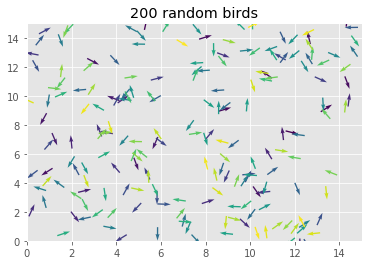

In [6]:
# quiver function to make plots of vector fields
xval=15*np.random.rand(200)
yval=15*np.random.rand(200)
theta=2*np.pi*np.random.rand(200)
plt.figure()
fig = plt.quiver(xval,yval,np.cos(theta),np.sin(theta), np.arange(len(xval)),scale=25, width=.004)
plt.xlim(0,15)
plt.ylim(0,15)
plt.title('200 random birds')
plt.show()

To see that the function `periodicBC` works, use `xval + 15` and `yval + 15` to create a new figure. The new figure and the old one should be the same.

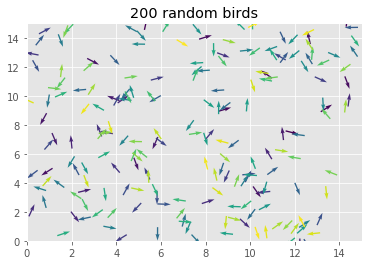

In [7]:
part11 = periodicBC(xval+15,yval+15,theta)
plt.figure()
plt.quiver(part11[0],part11[1],np.cos(part11[2]),np.sin(part11[2]), np.arange(len(xval)), scale=25, width=.004)
plt.xlim(0,15)
plt.ylim(0,15)
plt.title('200 random birds')
plt.show()

## Part 2

Firstly, in order to have a periodic boundry condition, we need to define a new distance function `distance1(a,b)`.

Define a function called `choose1(x)` to choose every bird whose distance between the bird x is closer than R. 

In [8]:
def choose1(x,R,xval,yval,theta):
    bird0 = []
    bird1 = []
    theta0 = []
    for i in range(len(xval)):
        a = [xval[i], yval[i]]
        if distance2(a,x) < R:
            bird0.append(a[0])
            bird1.append(a[1])
            theta0.append(theta[i])
    
    return bird0, bird1, theta0

Again, make a figure to illustrate the result

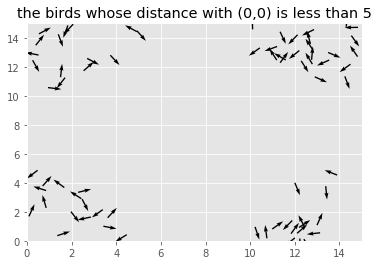

In [9]:
part21 = choose1([0,0],5,xval,yval,theta)
plt.figure()
plt.quiver(part21[0],part21[1],np.cos(part21[2]),np.sin(part21[2]), scale=25, width=.004)
plt.xlim(0,15)
plt.ylim(0,15)
plt.title('the birds whose distance with (0,0) is less than 5')
plt.show()

Now, define a function to apply the equations (9) and (10)

In [10]:
def position1(x,R,xval,yval,theta,sigma,v0):
    a = choose1(x,R,xval,yval,theta)
    vec = [0,0]
    n = np.zeros((len(a[0]),2))
    for i in range(len(a[0])):
        n[i] = [np.cos(a[2][i]), np.sin(a[2][i])]
    for t in range(len(a[0])):
        vec = vecsum1(n[t],vec)  # compute the vector sum
    vec = vec / distance1(vec,[0,0])
    theta0 = np.arctan2(vec[1], vec[0])
    theta0 += np.random.normal(0,np.sqrt(sigma),1)  # add the noise which is distributed to N(0,sigma).
    
    thetai = np.asscalar(theta0)
    ni = [np.cos(thetai), np.sin(thetai)]
    pos = vecsum1(np.array(ni)*v0, x)
    
    return pos[0], pos[1], thetai

Now we have a funtion `angle1` for equation (10) which means that if select a bird x with influential radius R and noise parameter sigma then we will get a new angle theta0. This angle can be inserted into equation (9) to get the position for bird x in a new time step. To do this,
We need to define a new function called `position1`

Apply this function to all birds **at the same time**. To do this, write a new function called `finalpos`

In [11]:
def finalpos(R,xval,yval,theta,sigma,v0):
    xval0 = np.zeros((len(xval)))
    yval0 = np.zeros((len(yval)))
    theta0 = np.zeros((len(theta)))
    for i in range(len(xval)):
        a = [xval[i], yval[i]]
        b = position1(a,R,xval,yval,theta,sigma,v0)
        xval0[i] = b[0]
        yval0[i] = b[1]
        theta0[i] = b[2]
    return xval0, yval0, theta0

Make an illustration to make sure that this function goes in correct direction:

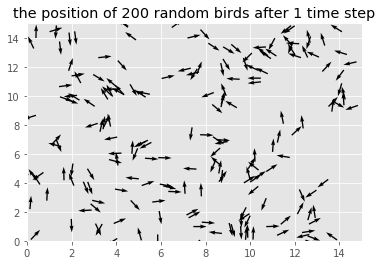

In [12]:
part22 = finalpos(1,xval,yval,theta,.001,.5)
part23 = periodicBC(part22[0],part22[1],part22[2])
plt.figure()
plt.quiver(part23[0] ,part23[1],
           np.cos(part23[2]),np.sin(part23[2]), scale=25, width=.004)
plt.xlim(0,15)
plt.ylim(0,15)
plt.title('the position of 200 random birds after 1 time step')
plt.show()

## Part 3

Define the `finalplot` function to make the figure after n time steps.

In [13]:
def finalplot(R,xval,yval,theta,sigma,v0,n,plot=True,verbose=False):
    a = np.zeros((n+1,3,len(xval)))
    a[0] = xval, yval, theta
    for i in range(n):
        a[i+1] = finalpos(R,a[i][0],a[i][1],a[i][2],sigma,v0) # determine the position
        a[i+1] = periodicBC(a[i+1][0], a[i+1][1], a[i+1][2]) # use the periodic boundary condition
        
    if plot:
        plt.figure()
        plt.quiver(a[n][0], a[n][1],
                   np.cos(a[n][2]),np.sin(a[n][2]), scale=25, width=.004)
        plt.xlim(0,15)
        plt.ylim(0,15)
        plt.title('the position of 200 random birds after {} time step'.format(n))
        plt.show()
    if verbose:
        return a

This is the distribution of birds after 1000 time steps.

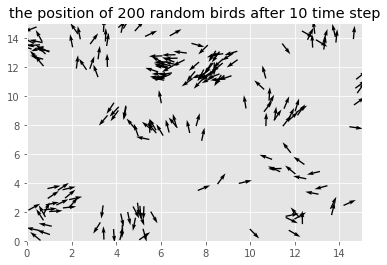

In [14]:
finalplot(1,xval,yval,theta,.1,.5,10)

Now consider the Vicsek order parameter which is a function of time step n.

In [15]:
def n1(theta):
    vec = [0,0]
    for i in range(len(theta)):
        a = [np.cos(theta[i]), np.sin(theta[i])]
        vec = vecsum1(a,vec)
    return distance1(vec,[0,0]) / len(theta)

The above function is to compute the Vicsek order parameter at a particular time step. To compute the parameter for every time step which is less that n, define the following function:

In [16]:
def VOP(R,xval,yval,theta,sigma,v0,n,plot=True,verbose=False): # use this function to compute the Vicsek order parameter.
    parameter = np.zeros(n+1)
    a = finalplot(R,xval,yval,theta,sigma,v0,n,plot=False,verbose=True)
    for i in range(n+1):
        theta0 = a[i][2]
        parameter[i] = n1(theta0)
    if plot:
        plt.figure()
        plt.plot(np.arange(n+1),parameter,label='the Vicsek order parameter')
        plt.plot([0,n],[1,1],'--')
        plt.ylim(0,1.1)
        plt.xlabel('time steps')
        plt.ylabel('the Vicsek order parameter')
        plt.title('a measure of the alignment between birds')
        plt.legend()
        plt.show()
    if verbose:
        return parameter

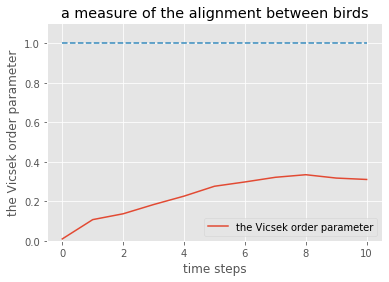

In [17]:
VOP(1,xval,yval,theta,.1,.5,10)

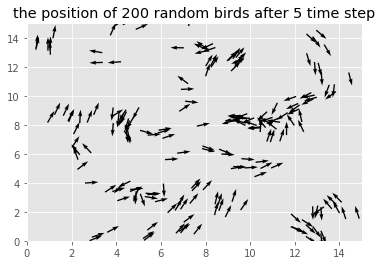

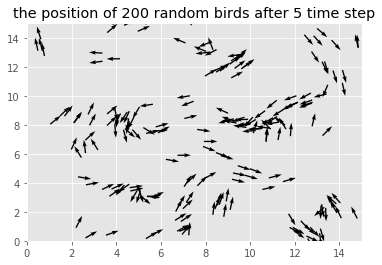

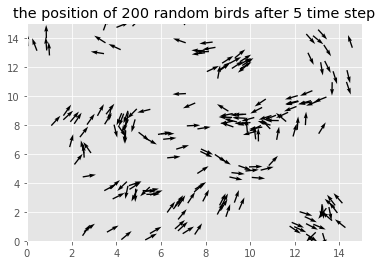

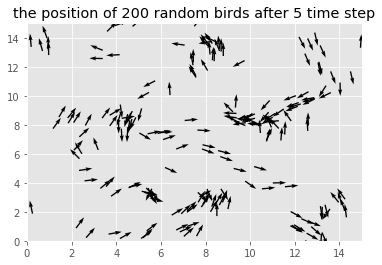

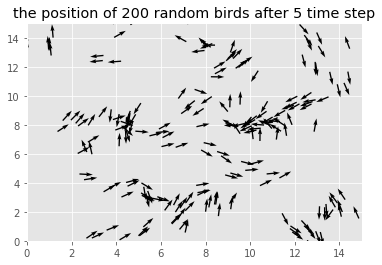

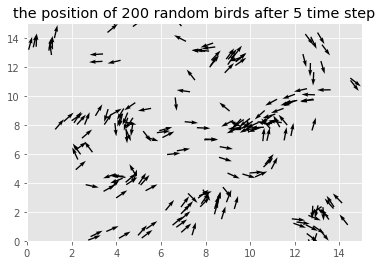

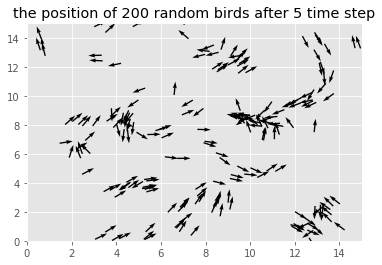

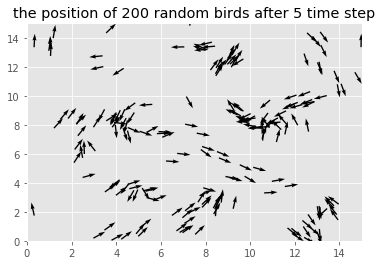

807 ms ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit finalplot(1,xval,yval,theta,.01,.5,5)

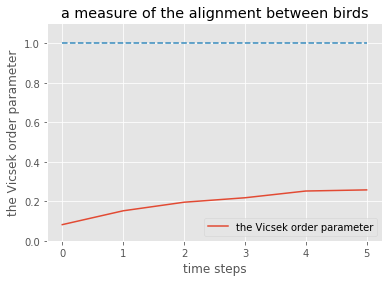

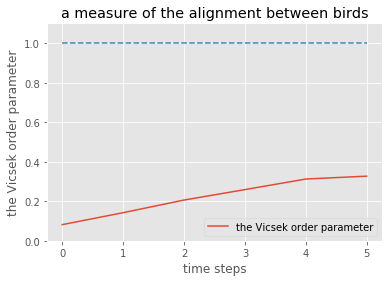

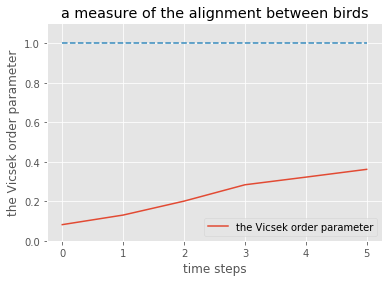

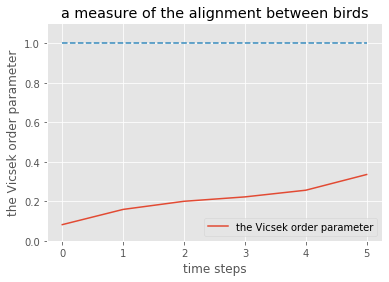

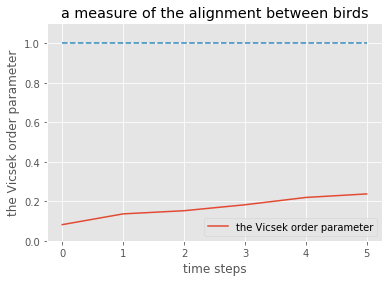

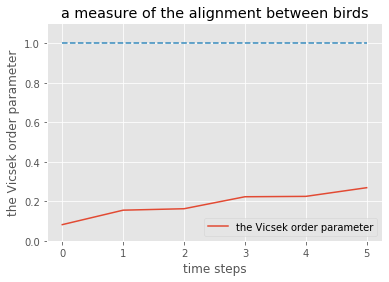

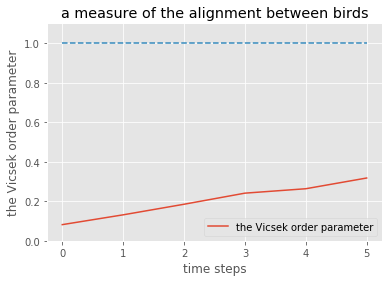

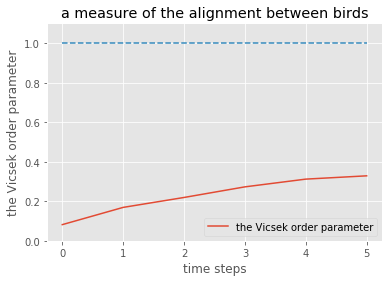

849 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
%timeit VOP(1,xval,yval,theta,.1,.5,5)

## Part 4

In this part, use python to derive several small movies to illustrate the Vicsek model.

In [18]:
import cv2
import glob

In order to create a small vedio we need to write a function to generate huge amount of figures in the same folder firstly. Notice that here the order of these figures is critical. 

In [55]:
def saveplot(R,xval,yval,theta,sigma,v0,n):
    a = finalplot(R,xval,yval,theta,sigma,v0,n,plot=False,verbose=True)
    for i in range(n+1):
        fig,ax = plt.subplots( nrows=1, ncols=1 )
        ax.quiver(a[i][0], a[i][1],
                  np.cos(a[i][2]),np.sin(a[i][2]), scale=25, width=.004)
        plt.xlim(0,15)
        plt.ylim(0,15)
        fig.savefig('C:/Users/chalk/Desktop/Vicsek/{}.png'.format(10000+i))   # save the figure to file
        plt.close(fig)

In [27]:
saveplot(1,xval,yval,theta,.5,.5,1000)

Now we can use these figures to create a movie. It is easy to get several movies by just changing the value of sigma. Here we choose sigma = 0.01, 0.1 and 0.5.

In [28]:
a = glob.glob('C:/Users/chalk/Desktop/Vicsek/*.png')
img_array = []
for filename in a:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    
out = cv2.VideoWriter('C:/Users/chalk/Desktop/sigma = {}.avi'.format(0.5),
                      cv2.VideoWriter_fourcc(*'DIVX'), 12, size)

for i in range(len(img_array)):
    out.write(img_array[i])
    
out.release()

## Part 5

In this part, we need to regard the Vicsek model parameter n as a function of the noise parameter sigma. The key idea here is that extract the n traces in terms of time steps and put it into a csv file. Then abandon the first several n which are not steady compared with the average.

Here we use `pandas`.

In [2]:
import pandas as pd

In [6]:
part51 = np.linspace(.01,1,10)

In [30]:
part52 = np.zeros((10,601))
for i in range(10):
    part52[i] = VOP(1,xval,yval,theta,part51[i],.5,600,plot=False,verbose=True)

In [31]:
part5columns = ['sigma = {}'.format(part51[i]) for i in range(10)]
part5index = ['step = {}'.format(n) for n in range(601)]
part5content = part52.T
df1 = pd.DataFrame(part5content, columns=part5columns, index=part5index)
df1

,sigma = 0.01,sigma = 0.12,sigma = 0.23,sigma = 0.34,sigma = 0.45,sigma = 0.56,sigma = 0.67,sigma = 0.78,sigma = 0.89,sigma = 1.0
step = 0,0.033575,0.033575,0.033575,0.033575,0.033575,0.033575,0.033575,0.033575,0.033575,0.033575
step = 1,0.021453,0.023675,0.020475,0.011089,0.046046,0.068877,0.019088,0.073517,0.031208,0.058196
step = 2,0.055409,0.056602,0.045226,0.053225,0.103083,0.094446,0.054977,0.055319,0.057052,0.103198
step = 3,0.106244,0.121711,0.123006,0.106243,0.148263,0.143828,0.056775,0.126922,0.072566,0.084462
step = 4,0.144833,0.180915,0.201447,0.139501,0.187894,0.181786,0.105800,0.179733,0.065771,0.142363
...,...,...,...,...,...,...,...,...,...,...
step = 596,0.987718,0.854961,0.737373,0.738875,0.411036,0.285281,0.136145,0.202384,0.078729,0.234736
step = 597,0.990428,0.861083,0.761713,0.733290,0.417596,0.286466,0.136605,0.188407,0.165169,0.167685
step = 598,0.989465,0.884152,0.747195,0.712629,0.435595,0.278966,0.131545,0.179330,0.123690,0.083762
step = 599,0.990584,0.871189,0.778788,0.711343,0.452755,0.199324,0.098696,0.099989,0.125556,0.108414


In [32]:
df1.to_csv("C:/Users/chalk/Desktop/Vicsek.csv")

Now we have the csv file which contains the n traces in terms of different sigma. Since only the values of n which are steady make sense, we abandon the first 121 `n`s for each sigma and extract the 122nd to the 201st. 

In [4]:
df2 = pd.read_csv("C:/Users/chalk/Desktop/Vicsek-sqrt-len(sigma)=10.csv",
                 delimiter=",", encoding = "ISO-8859-1")
df2.head()

,Unnamed: 0,sigma = 0.01,sigma = 0.12,sigma = 0.23,sigma = 0.34,sigma = 0.45,sigma = 0.56,sigma = 0.67,sigma = 0.78,sigma = 0.89,sigma = 1.0
0,step = 0,0.033575,0.033575,0.033575,0.033575,0.033575,0.033575,0.033575,0.033575,0.033575,0.033575
1,step = 1,0.021453,0.023675,0.020475,0.011089,0.046046,0.068877,0.019088,0.073517,0.031208,0.058196
2,step = 2,0.055409,0.056602,0.045226,0.053225,0.103083,0.094446,0.054977,0.055319,0.057052,0.103198
3,step = 3,0.106244,0.121711,0.123006,0.106243,0.148263,0.143828,0.056775,0.126922,0.072566,0.084462
4,step = 4,0.144833,0.180915,0.201447,0.139501,0.187894,0.181786,0.105800,0.179733,0.065771,0.142363


In [9]:
df2[401:601]

,Unnamed: 0,sigma = 0.01,sigma = 0.12,sigma = 0.23,sigma = 0.34,sigma = 0.45,sigma = 0.56,sigma = 0.67,sigma = 0.78,sigma = 0.89,sigma = 1.0
401,step = 401,0.986209,0.889838,0.785024,0.597146,0.601296,0.466171,0.260534,0.248777,0.140972,0.208584
402,step = 402,0.985976,0.892831,0.793194,0.625177,0.544496,0.397158,0.296666,0.329121,0.152268,0.256351
403,step = 403,0.985453,0.875324,0.768099,0.622124,0.588630,0.309167,0.250081,0.410779,0.164713,0.250516
404,step = 404,0.985686,0.883027,0.738075,0.634964,0.575318,0.360593,0.242694,0.421890,0.127854,0.281349
405,step = 405,0.985014,0.887157,0.692811,0.685649,0.605945,0.338539,0.193936,0.431282,0.149557,0.279413
...,...,...,...,...,...,...,...,...,...,...,...
596,step = 596,0.987718,0.854961,0.737373,0.738875,0.411036,0.285281,0.136145,0.202384,0.078729,0.234736
597,step = 597,0.990428,0.861083,0.761713,0.733290,0.417596,0.286466,0.136605,0.188407,0.165169,0.167685
598,step = 598,0.989465,0.884152,0.747195,0.712629,0.435595,0.278966,0.131545,0.179330,0.123690,0.083762
599,step = 599,0.990584,0.871189,0.778788,0.711343,0.452755,0.199324,0.098696,0.099989,0.125556,0.108414


In [7]:
part53 = np.zeros(10)
for i in range(10):
    part53[i] = np.mean(df2[401:601]['sigma = {}'.format(part51[i])])

Now we can make a plot where the average of Vicsek order parameter is a function of sigma.

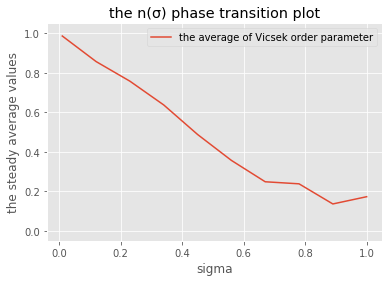

In [8]:
plt.figure()
plt.plot(part51,part53,label='the average of Vicsek order parameter')
plt.ylim(-0.05,1.05)
plt.xlabel('sigma')
plt.ylabel('the steady average values')
plt.title('the n(σ) phase transition plot')
plt.legend()
plt.show()

In order to create an error bar, now write a function which returns the `maxium distance` in a list.

Now create the error bar.

In [9]:
[np.std(df2[401:601]['sigma = {}'.format(part51[i])]) for i in range(len(part51))]

[0.004285202029185277,
 0.024326783875337172,
 0.033843957236321213,
 0.06196142773906886,
 0.0934832380685767,
 0.11737468873316378,
 0.0701329947214844,
 0.08503973324204396,
 0.06808608654267252,
 0.06969105302437809]

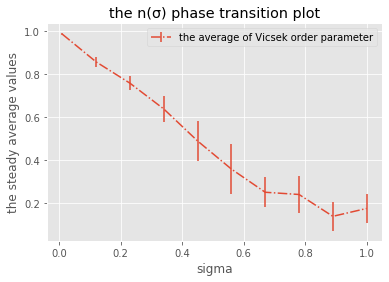

In [12]:
part5yerr = [np.std(df2[401:601]['sigma = {}'.format(part51[i])]) for i in range(len(part51))] 
fig, ax = plt.subplots()
ax.errorbar(part51, part53, yerr=part5yerr, fmt='-.', label='the average of Vicsek order parameter')
ax.set_xlabel('sigma')
ax.set_ylabel('the steady average values')
ax.set_title('the n(σ) phase transition plot')
ax.legend()
plt.show()

## Part 6

In this part, we add a prey in the previous system. Use the function `f = Rprey * log(1/x)` to describe the influences of the prey to the birds whose distances with the prey are less than `Rprey`.  

In [19]:
part6prey = [15*np.random.rand(), 15*np.random.rand()]
part6theta = 2*np.pi*np.random.rand()

For the prey, define a function compute its position at every step.

In [20]:
def position_prey(prey,preyangle,vprey,Rprey,xval,yval,theta):
    birds1 = choose1(prey,Rprey,xval,yval,theta)
    vec = np.array([0,0])
    if len(birds1[0]) == 0:
        return prey[0]+np.cos(preyangle)*vprey, prey[1]+np.sin(preyangle)*vprey, preyangle
    for i in range(len(birds1[0])):
        rinf = np.log(Rprey/distance2(prey,[birds1[0][i],birds1[1][i]])) # use the function f = log(Rprey/r)
        t = distance2(prey, [birds1[0][i], birds1[1][i]], change=True)
        inf = rinf * (np.array(t)
                      / distance1(t ,[0,0])) # influence of a particular bird
        vec = vecsum1(vec,inf)
    vec /= distance1(vec,[0,0]) 
    pos = vec*vprey + prey
    return pos[0] ,pos[1], np.arctan2(vec[1],vec[0])

Again use the function `y = (theta1 - theta2) * x / R + theta2` to consider the influence of the prey towards birds. Write a new function to consider the position of birds.

In [21]:
def position2(prey,Rprey,x,R,xval,yval,theta,sigma,v0):
    a = choose1(x,R,xval,yval,theta)
    vec = [0,0]
    n = np.zeros((len(a[0]),2))
    for i in range(len(a[0])):
        n[i] = [np.cos(a[2][i]), np.sin(a[2][i])]
    for t in range(len(a[0])):
        vec = vecsum1(n[t],vec)  # compute the vector sum
    vec = vec / distance1(vec,[0,0])
    theta0 = np.arctan2(vec[1], vec[0])
    
    if distance2(x,prey) < Rprey:  # the birds are as easily as the prey to notice each other.
        theta1 = np.arctan2(x[1]-prey[1] , x[0]-prey[0])
        distance = distance2(x,prey)
        theta0 = (theta1 - theta0) * distance / Rprey + theta0
    
    theta0 += np.random.normal(0,np.sqrt(sigma),1)  # add the noise which is distributed to N(0,sigma).
        
    thetai = np.asscalar(theta0)
    ni = [np.cos(thetai), np.sin(thetai)]
    pos = vecsum1(np.array(ni)*v0, x)
    
    return pos[0], pos[1], thetai

In [22]:
def finalpos1(prey,Rprey,R,xval,yval,theta,sigma,v0):
    xval0 = np.zeros((len(xval)))
    yval0 = np.zeros((len(yval)))
    theta0 = np.zeros((len(theta)))
    for i in range(len(xval)):
        a = [xval[i], yval[i]]
        b = position2(prey,Rprey,a,R,xval,yval,theta,sigma,v0)
        xval0[i] = b[0]
        yval0[i] = b[1]
        theta0[i] = b[2]
    return xval0, yval0, theta0

Now make a new plot:

In [23]:
def periodicBC1(a,b,c):
    while a > 15:
        a -= 15
    while a < 0:
        a += 15
    while b > 15:
        b -= 15
    while b < 0:
        b += 15
    return a,b,c

In [24]:
def finalplot_prey(prey,preyangle,vprey,Rprey,R,xval,yval,theta,sigma,v0,n,plot=True,verbose=False):
    a = np.zeros((n+1,3,len(xval)))
    b = np.zeros((n+1,3))
    a[0] = xval, yval, theta
    b[0] = prey[0], prey[1], preyangle
    for i in range(n):
        a[i+1] = finalpos1(b[i],Rprey,R,a[i][0],a[i][1],a[i][2],sigma,v0) # determine the position
        a[i+1] = periodicBC(a[i+1][0], a[i+1][1], a[i+1][2]) # use the periodic boundary condition
        
        b[i+1] = position_prey(b[i][:2],b[i][2],vprey,Rprey,a[i][0],a[i][1],a[i][2])
        b[i+1] = periodicBC1(b[i+1,0],b[i+1,1],b[i+1,2])
    if plot:
        plt.figure()
        plt.quiver(a[n][0], a[n][1],
                   np.cos(a[n][2]),np.sin(a[n][2]), np.arange(len(xval)),scale=25, width=.004)
        plt.quiver(b[n][0], b[n][1],
                   np.cos(b[n][2]),np.sin(b[n][2]), scale=12, width=.012)
        plt.xlim(0,15)
        plt.ylim(0,15)
        plt.title('the position of 200 random birds after {} time step'.format(n))
        plt.show()
    if verbose:
        return a, b

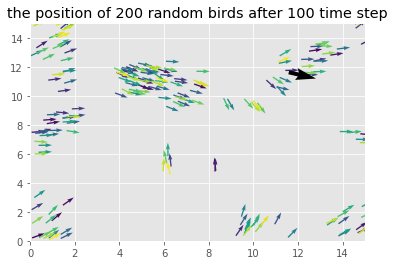

In [29]:
finalplot_prey(part6prey,part6theta,1,2,1,xval,yval,theta,.01,.5,100,plot=True,verbose=False)

Similarly, create several videos to illustrate the result.

In [25]:
def saveplot_prey(prey,preyangle,vprey,Rprey,R,xval,yval,theta,sigma,v0,n):
    a, b = finalplot_prey(prey,preyangle,vprey,Rprey,R,xval,yval,theta,
                       sigma,v0,n,plot=False,verbose=True)
    for i in range(n+1):
        fig,ax = plt.subplots(nrows=1, ncols=1)
        ax.quiver(a[i][0], a[i][1],
                  np.cos(a[i][2]),np.sin(a[i][2]), np.arange(len(xval)),scale=25, width=.004)
        ax.quiver(b[i][0], b[i][1],
                  np.cos(b[i][2]),np.sin(b[i][2]), scale=12, width=.012)
        
        plt.xlim(0,15)
        plt.ylim(0,15)
        fig.savefig('C:/Users/chalk/Desktop/Vicsek/{}.png'.format(10000+i))   # save the figure to the file
        plt.close(fig)

In [26]:
saveplot_prey(part6prey,part6theta,0.6,2,1,xval,yval,theta,.01,.5,1000)

In [27]:
a = glob.glob('C:/Users/chalk/Desktop/Vicsek/*.png')
img_array = []
for filename in a:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    
out = cv2.VideoWriter('C:/Users/chalk/Desktop/with prey_sigma = {}.avi'.format(0.01),
                      cv2.VideoWriter_fourcc(*'DIVX'), 12, size)

for i in range(len(img_array)):
    out.write(img_array[i])
    
out.release()